<a href="https://colab.research.google.com/github/baoquan25/bot_trading_stock/blob/main/D%C3%B9ng_bot_trading_CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas ta matplotlib alpaca-trade-api

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=4d60b7f2bf789e573b358a9bfea00432aba610b8724e1f9782d1cf11d3990e46
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-c6a6119f9ab7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TradeSignal'][data['MACD'] > data['Signal']] = 1  # Buy signal
<ipython-input-2-c6a6119f9ab7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TradeSignal'][data['MACD'] < data['Signal']] = -1  # Sell signal


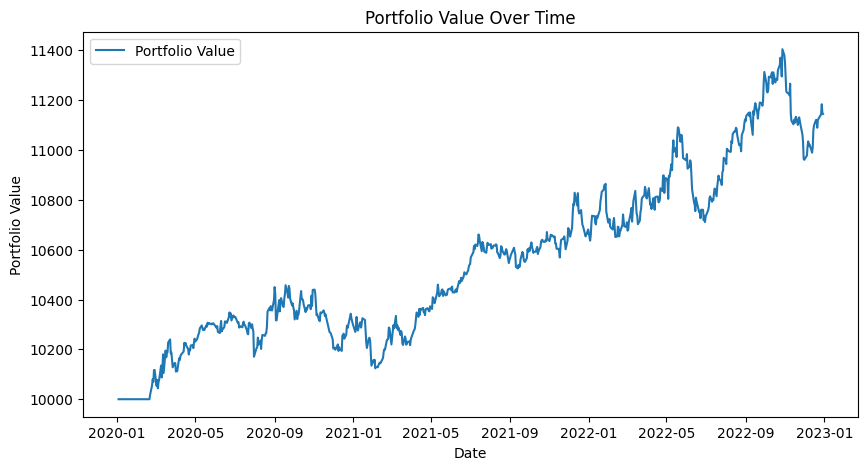

In [ ]:
# Constants
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"
initial_capital = 10000
shares = 10
api_key = 'YOUR_ALPACA_API_KEY'
api_secret = 'YOUR_ALPACA_API_SECRET'
base_url = 'https://paper-api.alpaca.markets'

# Fetch historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate MACD and Signal line
data['MACD'] = ta.trend.macd(data['Close'])
data['Signal'] = ta.trend.macd_signal(data['Close'])

# Define trading signals
data['TradeSignal'] = 0
data['TradeSignal'][data['MACD'] > data['Signal']] = 1  # Buy signal
data['TradeSignal'][data['MACD'] < data['Signal']] = -1  # Sell signal

# Generate trading orders
data['Position'] = data['TradeSignal'].diff()

# Backtest the strategy
data['Holdings'] = data['Close'] * shares * data['Position'].cumsum()
data['Cash'] = initial_capital - (data['Close'] * shares * data['Position']).cumsum()
data['Total'] = data['Holdings'] + data['Cash']

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data['Total'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Placeholder for live trading
api = tradeapi.REST(api_key, api_secret, base_url=base_url)

# Check for trading signals
if data['Position'].iloc[-1] == 1:
    api.submit_order(symbol=symbol, qty=shares, side='buy', type='market', time_in_force='gtc')
elif data['Position'].iloc[-1] == -1:
    api.submit_order(symbol=symbol, qty=shares, side='sell', type='market', time_in_force='gtc')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
hose = pd.read_csv('/content/CafeF.HSX.Upto14.06.2024.csv')
hose.head()

ParserError: Error tokenizing data. C error: Expected 7 fields in line 48273, saw 9


In [ ]:
#chuẩn hóa dữ liệu để dùng trong các hàm pandas
CP = hose[hose['<Ticker>']=='SAM']
CP = CP.drop('<Ticker>', axis = 1)
CP = CP.iloc[::-1]
CP = CP.reset_index(drop=True, inplace=False)
CP

NameError: name 'hose' is not defined

In [ ]:
#Phân tích dữ liệu, cụ thể MA20, MA50
CP['MA20']= CP['<Close>'].rolling(20).mean()
CP['MA50']= CP['<Close>'].rolling(50).mean()
CP

,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50
0,20231005,39.50,39.95,38.60,38.60,2705300.0,NaN,NaN
1,20231006,39.00,39.00,37.40,38.05,4005000.0,NaN,NaN
2,20231009,38.05,40.05,38.05,39.50,4739100.0,NaN,NaN
3,20231010,39.95,39.95,38.45,38.70,4360800.0,NaN,NaN
4,20231011,38.70,39.30,38.40,39.30,3649300.0,NaN,NaN
...,...,...,...,...,...,...,...,...
167,20240610,38.90,39.10,38.40,38.80,3966000.0,36.5475,34.910
168,20240611,39.05,39.65,38.75,39.00,5527800.0,36.8125,34.973
169,20240612,39.00,39.30,38.55,38.85,3571700.0,37.0200,35.025
170,20240613,39.05,39.40,38.70,38.80,4061700.0,37.2100,35.085


<function matplotlib.pyplot.show(close=None, block=None)>

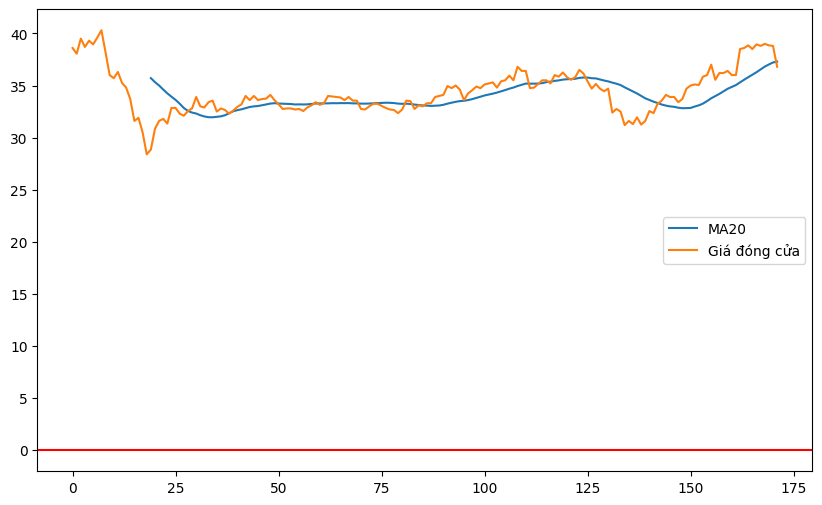

In [ ]:
# vẽ đồ thị
plt.figure(figsize=(10, 6))
CP['MA20'].plot(label='MA20')
CP['<Close>'].plot(label='Giá đóng cửa')
plt.axhline(y=0, color = 'red')
plt.legend()
plt.show

In [ ]:
#Chiến lược Mua bán theo MA20: Giá vượt mua và nắm giữ - Giá dưới MA20 bán và nằm im
CP['shares'] = [1 if CP.loc[i,'<Close>'] > CP.loc[i,'MA20'] else 0 for i in CP.index]
CP['<Close_new>'] = CP['<Close>'].shift(-1)
CP['Loilo'] = [CP.loc[i,'<Close_new>'] - CP.loc[i,'<Close>'] if CP.loc[i,'shares'] == 1 else 0 for i in CP.index]
CP

,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,shares,<Close_new>,Loilo
0,20231005,39.50,39.95,38.60,38.60,2705300.0,NaN,NaN,0,38.05,0.00
1,20231006,39.00,39.00,37.40,38.05,4005000.0,NaN,NaN,0,39.50,0.00
2,20231009,38.05,40.05,38.05,39.50,4739100.0,NaN,NaN,0,38.70,0.00
3,20231010,39.95,39.95,38.45,38.70,4360800.0,NaN,NaN,0,39.30,0.00
4,20231011,38.70,39.30,38.40,39.30,3649300.0,NaN,NaN,0,38.95,0.00
...,...,...,...,...,...,...,...,...,...,...,...
167,20240610,38.90,39.10,38.40,38.80,3966000.0,36.5475,34.910,1,39.00,0.20
168,20240611,39.05,39.65,38.75,39.00,5527800.0,36.8125,34.973,1,38.85,-0.15
169,20240612,39.00,39.30,38.55,38.85,3571700.0,37.0200,35.025,1,38.80,-0.05
170,20240613,39.05,39.40,38.70,38.80,4061700.0,37.2100,35.085,1,36.80,-2.00


Giá vốn: 28.85
 Hiệu suất(%):  5.387647831800293
Nắm giữ dài hạn: 38.8


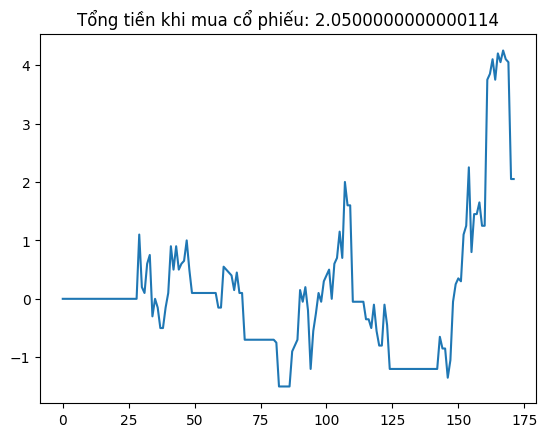

In [ ]:
#Tính lời lỗ của chiến lược
CP['Taisan'] = CP['Loilo'].cumsum()
CP['Taisan'].plot()
CP
plt.title('Tổng tiền khi mua cổ phiếu: {}'.format(CP.loc[CP.index[-1],'Taisan']))
print('Giá vốn:', CP.loc[CP.index[19],'<Close>'])
hs = CP.loc[CP.index[-2],'Taisan']/CP.loc[CP.index[1],'<Close>']*100
print('\033[1m Hiệu suất(%): \033[0m',hs)
print('Nắm giữ dài hạn:',CP.loc[CP.index[-2],'<Close>'])